In [51]:
#Câu 1.1: In ra danh sách các cột
import numpy as np
import pandas as pd
df= pd.read_csv("vnstock_listing_companies.csv")
print("Danh sách các cột là:\n",df.columns)

#Câu 1.2: In ra số dòng dữ liệu của bảng
print("Số dòng dữ liệu là:",len(df))

Danh sách các cột là:
 Index(['ticker', 'exchange', 'shortName', 'industry', 'industryEn',
       'establishedYear', 'noEmployees', 'noShareholders', 'foreignPercent',
       'website', 'stockRating', 'outstandingShare', 'issueShare',
       'companyType', 'monthlyRecords'],
      dtype='object')
Số dòng dữ liệu là: 1155


In [4]:
#Câu 2: Hiển thị thông tin tương ứng của cổ phiếu COM từ file vnstock_listing_companies.csv
companies_info = df[df['ticker'] == 'COM']
if not companies_info.empty:
    companies_info = companies_info[['ticker', 'shortName', 'monthlyRecords']]
    print("Thông tin của cổ phiếu COM:")
    print(companies_info)
else:
    print("Cổ phiếu COM không tồn tại trong danh sách công ty")

Thông tin của cổ phiếu COM:
  ticker        shortName monthlyRecords
1    COM  Vật tư Xăng dầu        COM.csv


In [54]:
#Câu 3: Thực hiện thống kê số lượng giao dịch, giá Close trung bình, giá Close cao nhất, giá Close thấp nhất của cổ phiếu COM trong khoảng thời gian từ tháng 8 đến tháng 9 năm 2023.
import pandas as pd
df= pd.read_csv("COM.csv")

# Chuyển cột 'time' sang định dạng datetime
df['time'] = pd.to_datetime(df['time'])

# Lọc dữ liệu trong khoảng thời gian từ tháng 8 đến tháng 9 năm 2023
start_date = '2023-08-01'
end_date = '2023-09-30'
filtered_df = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

# Thống kê số lượng giao dịch
transaction_count = filtered_df.shape[0]

# Tính giá Close trung bình
average_close_price = filtered_df['close'].mean()

# Tìm giá Close cao nhất và giá Close thấp nhất
max_close_price = filtered_df['close'].max()
min_close_price = filtered_df['close'].min()

print(df)
print(f"Số lượng giao dịch trong khoảng thời gian từ tháng 8 đến tháng 9 năm 2023: {transaction_count}")
print(f"Giá Close trung bình: {average_close_price}")
print(f"Giá Close cao nhất: {max_close_price}")
print(f"Giá Close thấp nhất: {min_close_price}")


         time   open   high    low  close  volume ticker
0  2023-01-03  25660  27760  25660  27760     300    COM
1  2023-01-04  26760  26760  26760  26760     100    COM
2  2023-01-05  28620  28620  28620  28620     100    COM
3  2023-01-06  26760  26760  26760  26760     100    COM
4  2023-01-11  28620  28620  28570  28570     300    COM
..        ...    ...    ...    ...    ...     ...    ...
79 2023-09-27  32150  32150  32000  32000     500    COM
80 2023-10-06  31000  31000  30050  30050     200    COM
81 2023-10-10  32150  32150  32150  32150     400    COM
82 2023-10-12  30200  34400  30200  34400     200    COM
83 2023-10-13  32500  32500  32000  32000     300    COM

[84 rows x 7 columns]
Số lượng giao dịch trong khoảng thời gian từ tháng 8 đến tháng 9 năm 2023: 14
Giá Close trung bình: 32628.571428571428
Giá Close cao nhất: 34000
Giá Close thấp nhất: 30050


In [59]:
#Câu 4
import pandas as pd
import numpy as np
df = pd.read_csv("COM.csv")
df['Info01'] = np.where(df['close'] > df['open'], 1, np.where(df['close'] < df['open'], -1, 0))
# Lưu dữ liệu đã cập nhật vào tệp CSV
df.to_csv("COM_Stock.csv", index=False)
# Hiển thị thông báo hoàn thành
print(df)
print(f"Đã thêm cột 'Info01' và xuất dữ liệu ra file COM_Stock.csv")


          time   open   high    low  close  volume ticker  Info01
0   2023-01-03  25660  27760  25660  27760     300    COM       1
1   2023-01-04  26760  26760  26760  26760     100    COM       0
2   2023-01-05  28620  28620  28620  28620     100    COM       0
3   2023-01-06  26760  26760  26760  26760     100    COM       0
4   2023-01-11  28620  28620  28570  28570     300    COM      -1
..         ...    ...    ...    ...    ...     ...    ...     ...
79  2023-09-27  32150  32150  32000  32000     500    COM      -1
80  2023-10-06  31000  31000  30050  30050     200    COM      -1
81  2023-10-10  32150  32150  32150  32150     400    COM       0
82  2023-10-12  30200  34400  30200  34400     200    COM       1
83  2023-10-13  32500  32500  32000  32000     300    COM      -1

[84 rows x 8 columns]
Đã thêm cột 'Info01' và xuất dữ liệu ra file COM_Stock.csv


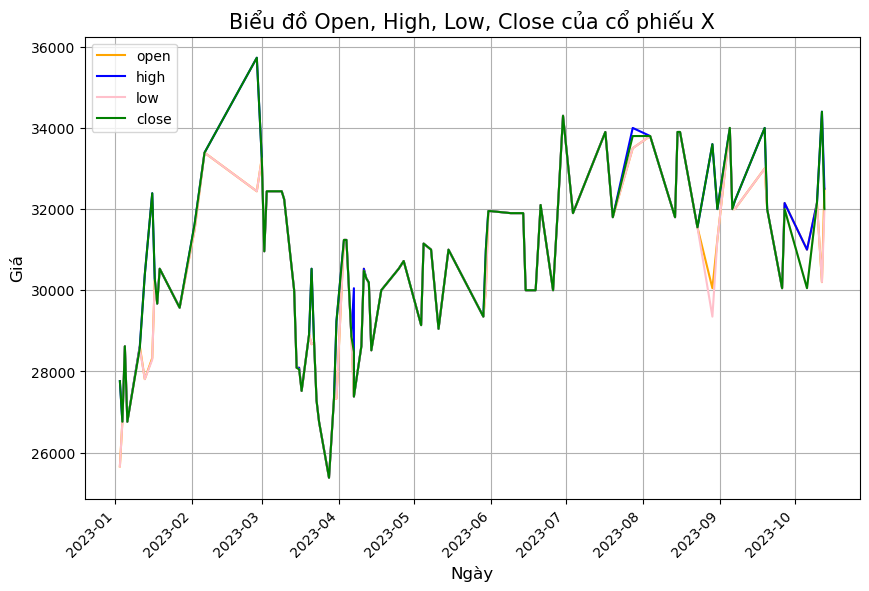

In [91]:
#Câu 5: Vẽ biểu đồ dạng đường thể hiện [Open, High, Low, Close] của cổ phiếu X.
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('COM_Stock.csv')
#Định dạng lại cột Date thành kiểu datetime
df['time'] = pd.to_datetime(df['time'])

# Chọn cột 'open', 'high', 'low', 'close' từ DataFrame
open_prices = df['open']
high_prices = df['high']
low_prices = df['low']
close_prices = df['close']

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df['time'], open_prices, label= 'open', color='orange')
plt.plot(df['time'], high_prices, label= 'high', color='blue')
plt.plot(df['time'], low_prices, label= 'low', color='pink')
plt.plot(df['time'], close_prices, label= 'close', color='green')

# Xoay các nhãn trục x để dễ đọc hơn
plt.xticks(rotation=45, ha='right', fontsize=10)  # Xoay các nhãn trục x để dễ đọc hơn

# Đặt tên cho các trục và biểu đồ
plt.title('Biểu đồ Open, High, Low, Close của cổ phiếu X', fontsize=15)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá', fontsize=12)
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


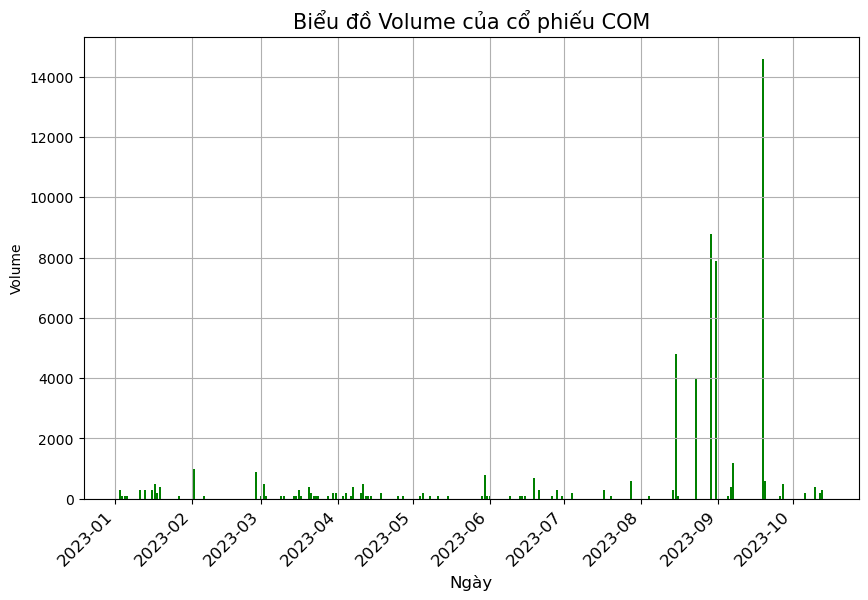

In [27]:
#Câu 6: Vẽ biểu đồ dạng cột chứa thông tin Volume của cổ phiếu COM.
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('COM.csv')

#Định dạng lại cột Date thành kiểu datetime
df['time'] = pd.to_datetime(df['time'])


# Chọn cột 'volume' từ DataFrame
volume = df['volume']

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(df['time'], volume, color='green')

# Đặt tên cho các trục và biểu đồ
plt.title('Biểu đồ Volume của cổ phiếu COM', fontsize=15)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Xoay các nhãn trục x để dễ đọc hơn
plt.grid(True)


# Hiển thị biểu đồ
plt.show()



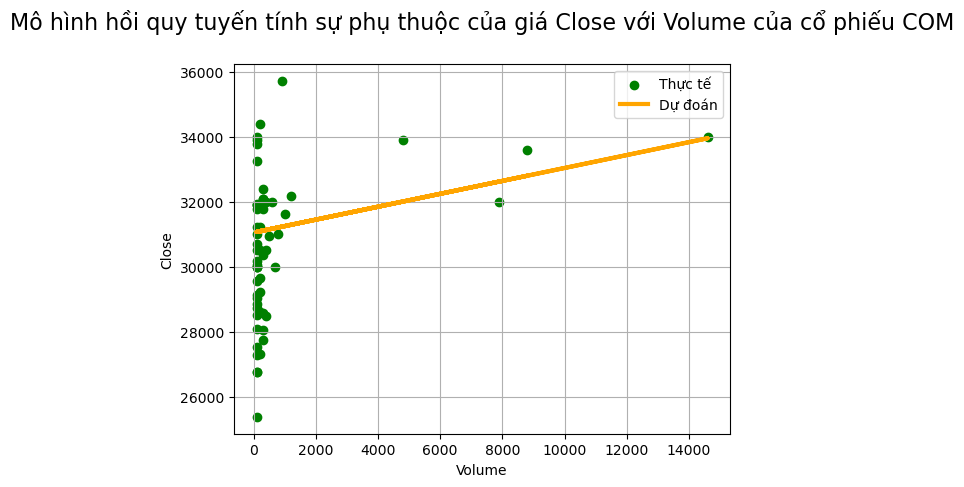

In [2]:
#Câu 7: Từ file COM_Stock.csv trên, xây dựng mô hình hồi quy tuyến tính diễn tả sự phụ thuộc của giá Close với Volume của cổ phiếu COM.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('COM_Stock.csv')

# Chọn các cột 'Volume' và 'Close' để tạo mô hình
data = df[['volume', 'close']]
X = data[['volume']]
y = data['close']

# Chia dữ liệu thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=30)

# Tạo mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Vẽ đồ thị mô hình hồi quy
plt.scatter(X_test, y_test, color='green', label='Thực tế')
plt.plot(X_test, y_pred, color='orange', linewidth=3, label='Dự đoán')
plt.title('Mô hình hồi quy tuyến tính sự phụ thuộc của giá Close với Volume của cổ phiếu COM\n', fontsize=16)
plt.xlabel('Volume')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
# Hiển thị biểu đồ
plt.show()

In [93]:
#Câu 8: Dựa vào mô hình vừa xây dựng ở bước trên, nhập 10 giá trị Volume bất kì và đưa ra dự đoán giá Close tương ứng.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Đọc dữ liệu từ file CSV
df = pd.read_csv('COM_Stock.csv')

# Chọn các cột 'open', 'high', 'low', 'volume' làm đặc trưng và 'close' làm nhãn
X = df[['open', 'high', 'low', 'volume']]
y = df['close']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Nhập 10 giá trị Volume bất kì (đặt giá trị của volume tương ứng vào list volumes)
volumes = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Dự đoán giá Close tương ứng
predictions = model.predict([[X_test['open'].mean(), X_test['high'].mean(), X_test['low'].mean(), volume] for volume in volumes])

# Hiển thị kết quả
for volume, prediction in zip(volumes, predictions):
    print(f'Volume: {volume}, Predicted Close: {prediction}')

Volume: 100, Predicted Close: 30589.751809910507
Volume: 200, Predicted Close: 30591.331667881965
Volume: 300, Predicted Close: 30592.911525853422
Volume: 400, Predicted Close: 30594.49138382488
Volume: 500, Predicted Close: 30596.071241796337
Volume: 600, Predicted Close: 30597.651099767794
Volume: 700, Predicted Close: 30599.23095773925
Volume: 800, Predicted Close: 30600.81081571071
Volume: 900, Predicted Close: 30602.390673682166
Volume: 1000, Predicted Close: 30603.970531653624
